### 히스토그램 평활화

179.8700408935547
128.45171737670898


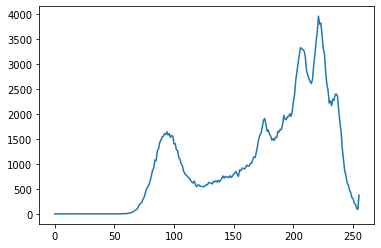

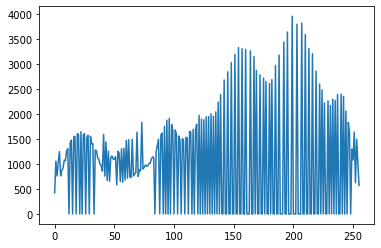

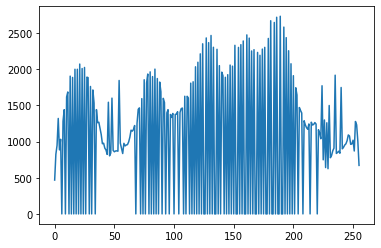

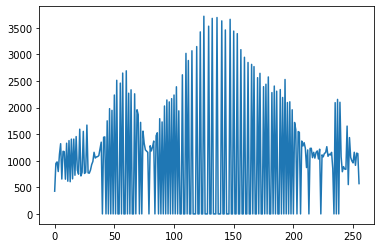

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

src = cv2.imread('c:/data/lena.jpg')

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
v2 = cv2.equalizeHist(v)
hsv2 = cv2.merge([h, s, v2])
src2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)

s2 = cv2.equalizeHist(s)
hsv3 = cv2.merge([h, s2, v2])
src4 = cv2.cvtColor(hsv3, cv2.COLOR_HSV2BGR)

ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, cr, cb = cv2.split(ycrcb)
y2 = cv2.equalizeHist(y)
ycrcb2 = cv2.merge([y2, cr, cb])
src3 = cv2.cvtColor(ycrcb2, cv2.COLOR_YCrCb2BGR)

hist1 = cv2.calcHist(images=[hsv], channels=[2], mask=None, histSize=[256], ranges=[0, 256])
hist2 = cv2.calcHist(images=[hsv2], channels=[2], mask=None, histSize=[256], ranges=[0, 256])
hist3 = cv2.calcHist(images=[ycrcb2], channels=[0], mask=None, histSize=[256], ranges=[0, 256])
hist4 = cv2.calcHist(images=[hsv3], channels=[1], mask=None, histSize=[256], ranges=[0, 256])

# 평균 지수, numpy 연산
print(np.mean(v))
print(np.mean(v2))

plt.plot(hist1)
plt.show()

plt.plot(hist2)
plt.show()

plt.plot(hist3)
plt.show()

plt.plot(hist4)
plt.show()

cv2.imshow('src', src)
cv2.imshow('hsv', src2)
cv2.imshow('hsv2', src4)
cv2.imshow('ycrcb', src3)
cv2.waitKey()
cv2.destroyAllWindows()

### 웹캠으로 색상 평활화

In [1]:
import cv2

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v2 = cv2.equalizeHist(v)
    hsv2 = cv2.merge([h, s, v2])
    frame2 = cv2.cvtColor(hsv2, cv2.COLOR_HSV2BGR)
    cv2.imshow('frame', frame2)
    key = cv2.waitKey(25)
    if key == 27:
        break

cv2.destroyAllWindows()